In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
data1 = pd.read_csv('data.csv')
data2 = pd.read_csv('merged_crowd_results.csv')

In [103]:
# Preprocess the first dataset
def remove (x):
    no_punct = ""
    for char in x:
            if char in '''qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM ''':
                    no_punct = no_punct + char
    return no_punct


def lower (x):
    return x.lower()

def rep (text):
    a = text.replace('Indication: Symptomatic relief','indication_symptomatic_relief')
    b = a.replace('Indication: treatment','indication_treatment')
    c = b.replace('Effect','effect')
    d = c.replace('Contraindication', 'contraindication')
    return d
    

In [104]:
data3 = data2.drop(data2[(data2.relation_type =='i_dont_know' ) | (data2.relation_type =='unrelated') | (data2.relation_type == 'I dont know')].index)

In [124]:
data1['disease_name'] = data1['disease_name'].apply(lower)
data1['drug_name'] = data1['drug_name'].apply(lower)
data3['disease_name'] = data3['disease_name'].apply(lower)
data3['drug_name'] = data3['drug_name'].apply(lower)
data3['relation_type'] = data3['relation_type'].apply(rep)
data3 = data3.drop(['worker_id'], axis=1)

data_agg = pd.concat([data1, data3], sort=True)


In [137]:
print(data1.shape)
print(data3.shape)
print(data_agg.shape)
print(data5.shape)

(1322, 10)
(2163, 10)
(3485, 10)
(337, 10)


indication_treatment             2149
indication_symptomatic_relief     596
contraindication                  440
effect                            300
Name: relation_type, dtype: int64

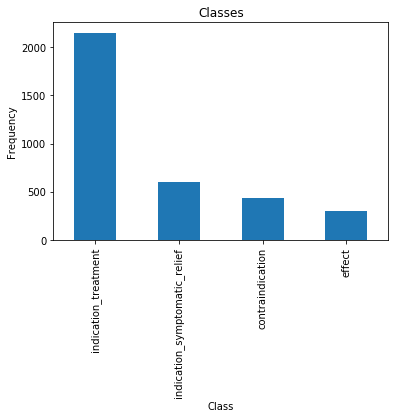

In [149]:
pd.value_counts(data_agg['relation_type']).plot.bar()
plt.title('Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
data_agg['relation_type'].value_counts()